ref: http://rpubs.com/martinctc/surveyanalysis1

In [ ]:
library(haven) #part of the tidyverse
haven::read_sav() #import SPSS files

library(readr) #part of the tidyverse
readr::read_csv() #import csv files

library(readxl)
readxl::read_xlsx() #import xlsx files

In [1]:
library(tidyverse)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
#simulat data

set.seed(69)
resp_id <- 1:2000
gender <- round(runif(2000,min=0,max=1)) #0 is male, 1 is female
age <- sample(c("18-24","25-34","35-54","55-64","65+"),2000,replace=TRUE,prob=c(0.15,0.20,0.3,0.15,0.2))
visited_prev <- round(runif(2000,min=0,max=1)) #Whether respondent has visited before
csat <- round(runif(2000,min=0,max=10)) #Customer Satisfaction Score
csat[which(visited_prev==0)] <- NA #NA if respondent had not visited before
df <- data.frame(resp_id,gender,age,visited_prev,csat) #assign to a data frame

In [3]:
head(df)

resp_id,gender,age,visited_prev,csat
1,1,55-64,0,NA
2,1,35-54,1,9
3,1,55-64,0,NA
4,1,55-64,0,NA
5,0,18-24,0,NA
6,1,18-24,0,NA


In [4]:
glimpse(df)

Observations: 2,000
Variables: 5
$ resp_id      <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ gender       <dbl> 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,…
$ age          <fct> 55-64, 35-54, 55-64, 55-64, 18-24, 18-24, 18-24, 35-54, …
$ visited_prev <dbl> 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,…
$ csat         <dbl> NA, 9, NA, NA, NA, NA, 9, NA, NA, 5, NA, 7, NA, NA, NA, …


In [5]:
df$resp_id<- as.character(df$resp_id)

In [8]:
# to make id as 3-digit id
library(stringr)
df$resp_id <- str_pad(df$resp_id, 3, side = "left", pad = "0")

In [9]:
head(df)

resp_id,gender,age,visited_prev,csat
001,1,55-64,0,NA
002,1,35-54,1,9
003,1,55-64,0,NA
004,1,55-64,0,NA
005,0,18-24,0,NA
006,1,18-24,0,NA


In [13]:
# The other bits that we have to do is to coerce the other categorical variables in 
# the data into factors. This is straightforward to do in R:
df$gender <- factor(df$gender)
levels(df$gender) <- c("male", "female")

df$visited_prev <- factor(df$visited_prev)


In [14]:
head(df)

resp_id,gender,age,visited_prev,csat
001,female,55-64,0,NA
002,female,35-54,1,9
003,female,55-64,0,NA
004,female,55-64,0,NA
005,male,18-24,0,NA
006,female,18-24,0,NA


In [16]:
prop.table(table(df$gender))


  male female 
0.5125 0.4875 

In [20]:
install.packages("gmodels")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [21]:
library(gmodels)

In [22]:
CrossTable(df$gender, df$age)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  2000 

 
             | df$age 
   df$gender |     18-24 |     25-34 |     35-54 |     55-64 |       65+ | Row Total | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
        male |       146 |       206 |       314 |       150 |       209 |      1025 | 
             |     0.006 |     0.641 |     0.038 |     0.058 |     0.100 |           | 
             |     0.142 |     0.201 |     0.306 |     0.146 |     0.204 |     0.512 | 
             |     0.516 |     0.485 |     0.518 |     0.523 |     0.524 |           | 
             |     0.073 |     0.103 |     0.157 |     0.075 |     0.104 |           | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
      female |   

In [26]:
# make table cleaner
CrossTable(df$gender, df$age,prop.r = F, prop.t = F, chisq = F)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Col Total |
|-------------------------|

 
Total Observations in Table:  2000 

 
             | df$age 
   df$gender |     18-24 |     25-34 |     35-54 |     55-64 |       65+ | Row Total | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
        male |       146 |       206 |       314 |       150 |       209 |      1025 | 
             |     0.006 |     0.641 |     0.038 |     0.058 |     0.100 |           | 
             |     0.516 |     0.485 |     0.518 |     0.523 |     0.524 |           | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
      female |       137 |       219 |       292 |       137 |       190 |       975 | 
             |     0.007 |     0.673 |     0.040 |     0.061 |     0.105 |           | 
             |     0.484 |     0.515 |     0.482 |     0.477 |     0.476 

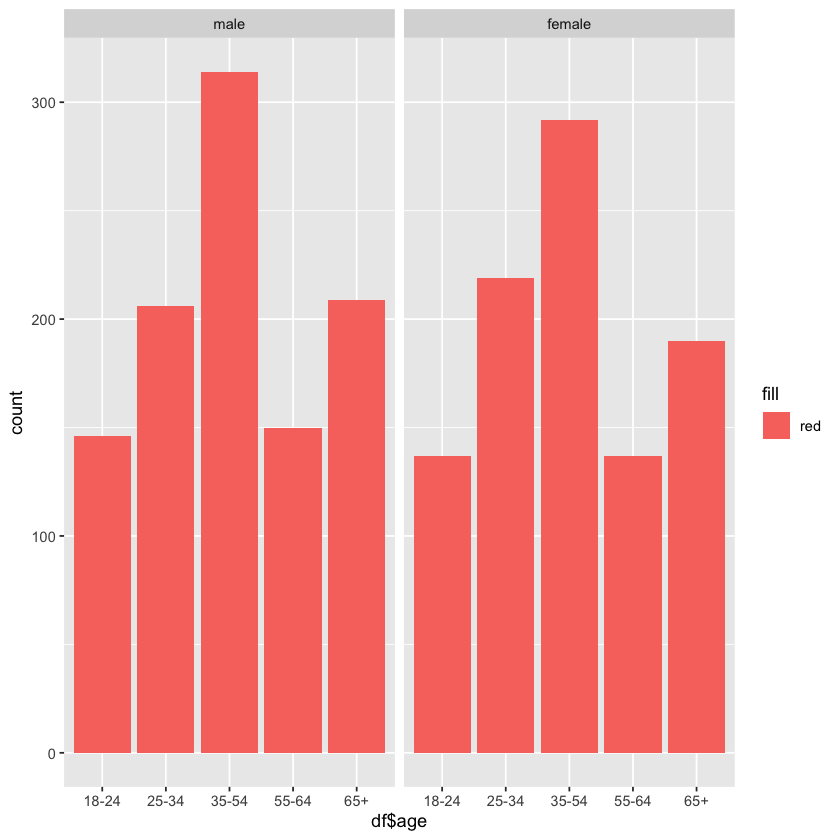

In [35]:
ggplot(df, aes(df$age, fill="red"))+ geom_bar()+ facet_grid(~gender)

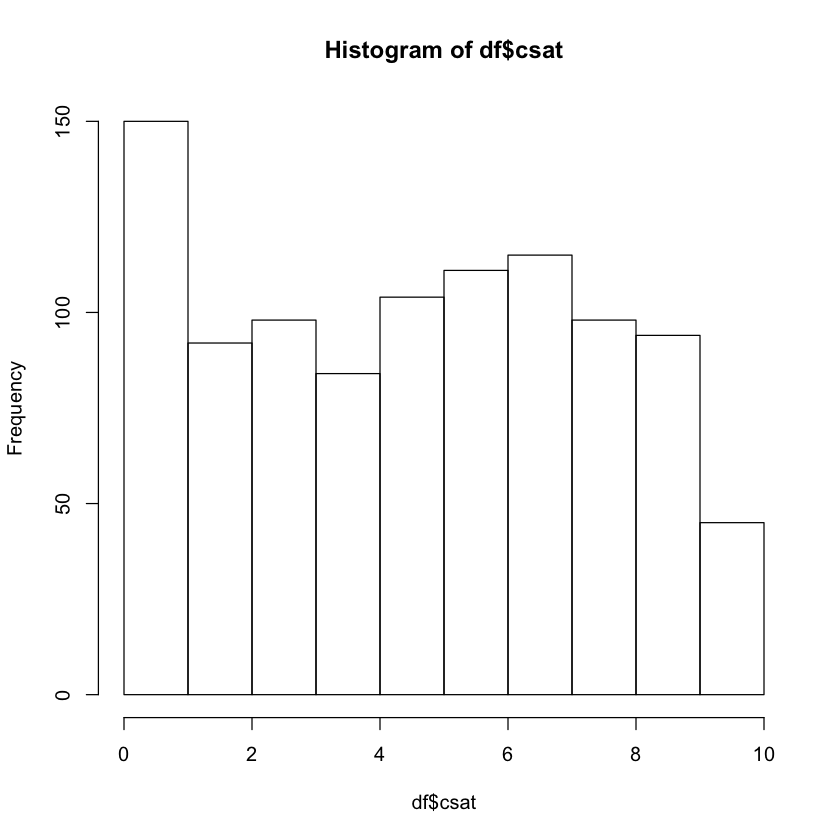

In [36]:
hist(df$csat)

Warning message:
“Removed 1009 rows containing non-finite values (stat_bin).”

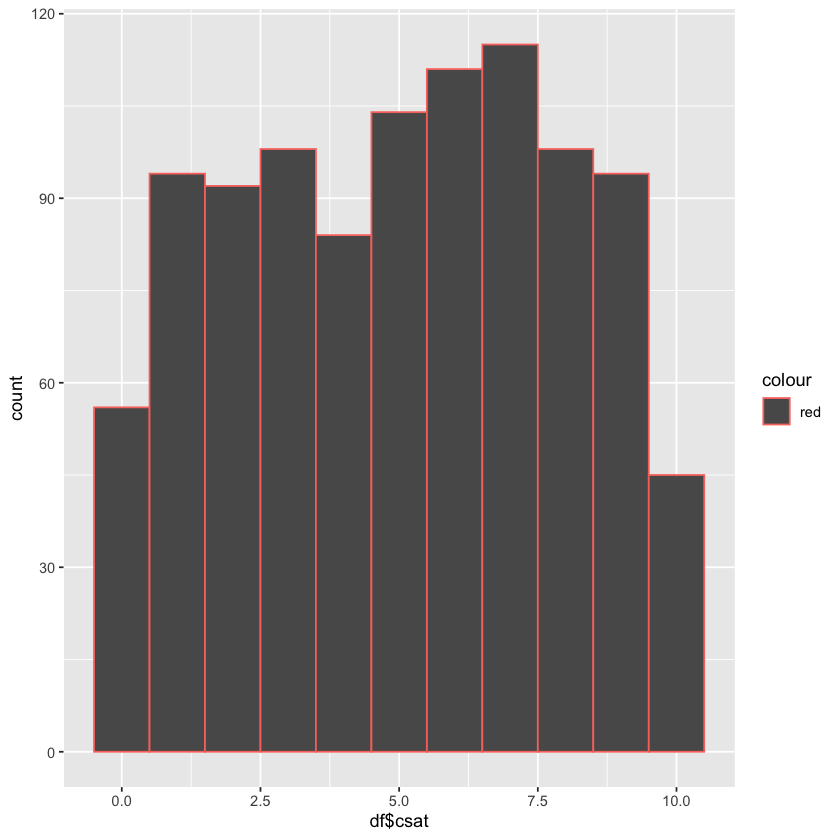

In [43]:
ggplot(df, aes(df$csat, color= "red"))+ geom_histogram(binwidth = 1)

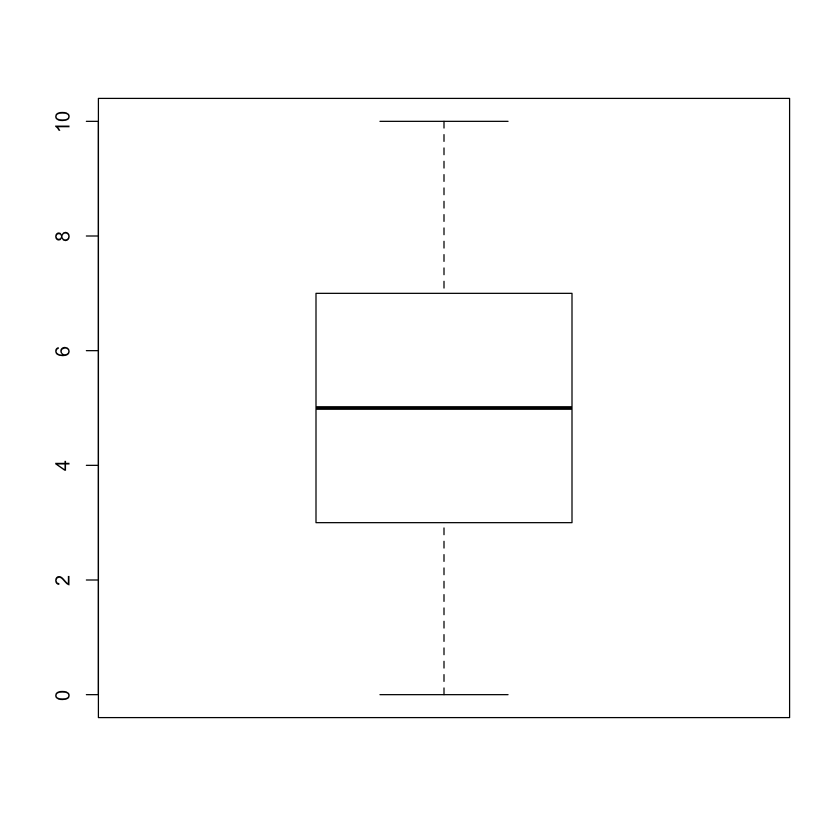

In [45]:
boxplot(df$csat, data= df)

Warning message:
“Removed 1009 rows containing non-finite values (stat_boxplot).”

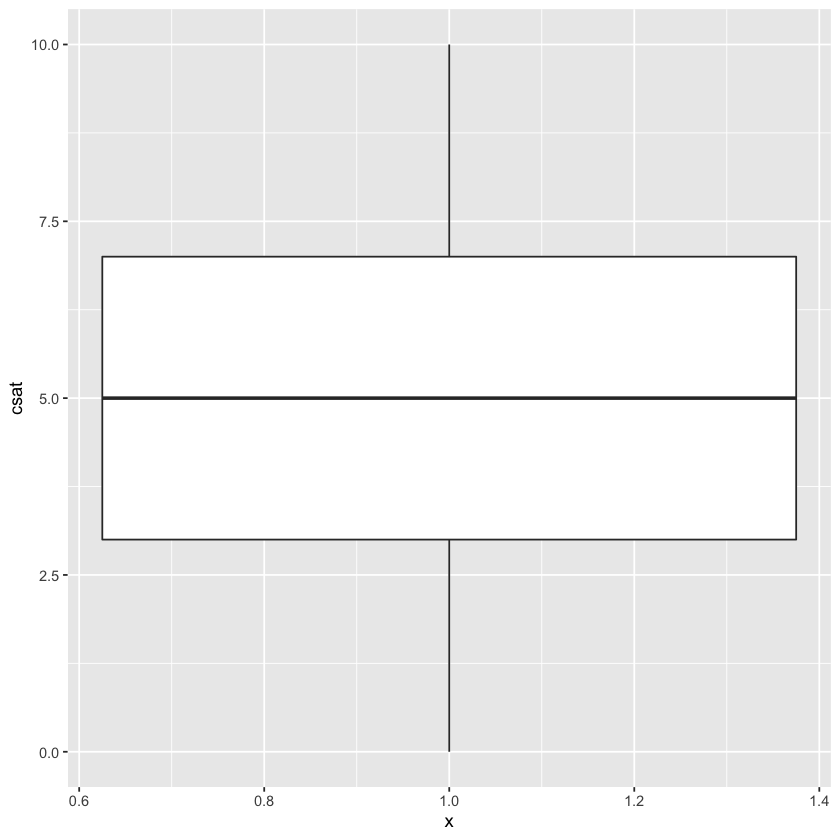

In [46]:
ggplot(df, aes(x= 1, y= csat))+ geom_boxplot()

Warning message:
“Removed 1009 rows containing non-finite values (stat_boxplot).”

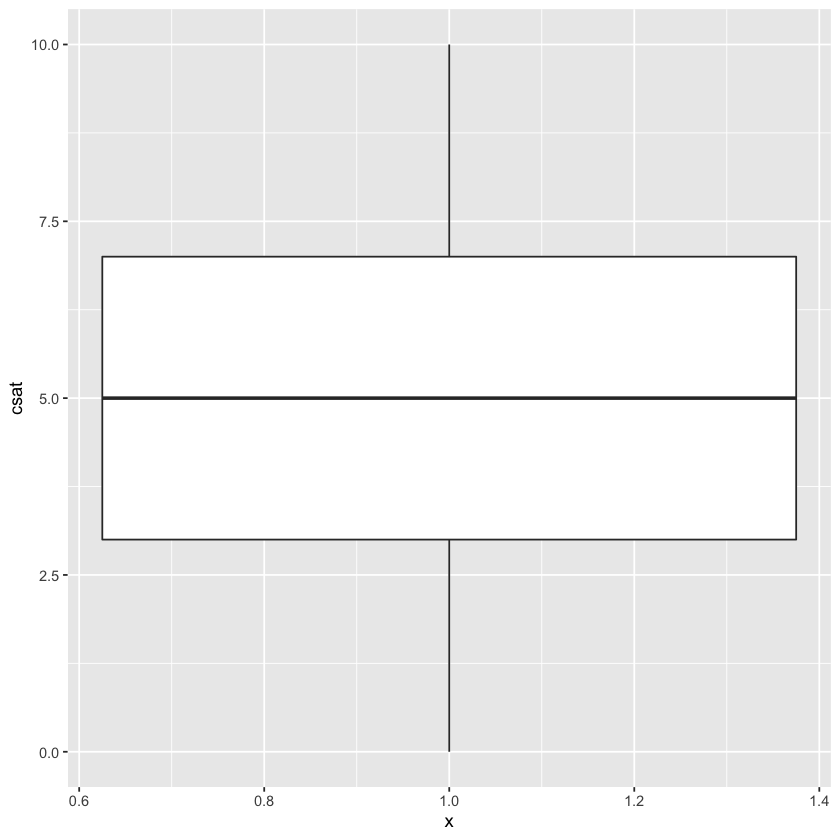

In [50]:
ggplot(df, aes(x= 1, y=csat))+ geom_boxplot()